# # ARIMA Models in Python - Part 4

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pm

import joblib

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

## Datasets

### Milk production

In [6]:
milk_production_dataset = pd.read_csv('../datasets/time series/milk_production.csv', index_col='date', parse_dates=['date'])
milk_production_dataset = milk_production_dataset.asfreq('MS')

### Water

In [51]:
water_dataset = pd.read_csv('../datasets/time series/water.csv', index_col='date', parse_dates=['date'])
water_dataset = water_dataset.asfreq('MS')

### Australia employment

In [64]:
aus_employment_dataset = pd.read_csv('../datasets/time series/aus_employment.csv', index_col='date', parse_dates=['date'])
aus_employment_dataset = aus_employment_dataset.asfreq('MS')

### Wisconsin

In [82]:
wisconsin_test_dataset = pd.read_csv('../datasets/time series/wisconsin_test.csv', index_col='date', parse_dates=['date'])
wisconsin_test_dataset = wisconsin_test_dataset.asfreq('MS')

wisconsin_train_dataset = pd.read_csv('../datasets/time series/wisconsin_train.csv', index_col='date', parse_dates=['date'])
wisconsin_train_dataset = wisconsin_train_dataset.asfreq('MS')

### Sample

In [103]:
sample_dataset = pd.read_csv('../datasets/time series/sample2.csv', index_col=0, parse_dates=True)
sample_dataset = sample_dataset.asfreq('D')

### CO2

In [129]:
co2_dataset = pd.read_csv('../datasets/time series/co2.csv', index_col='date', parse_dates=['date'])
co2_dataset = co2_dataset.asfreq('MS')

## Seasonal ARIMA Models
In this final chapter, you'll learn how to use seasonal ARIMA models to fit more complex data. You'll learn how to decompose this data into seasonal and non-seasonal parts and then you'll get the chance to utilize all your ARIMA tools on one last global forecast challenge.

### Seasonal decompose
You can think of a time series as being composed of trend, seasonal and residual components. This can be a good way to think about the data when you go about modeling it. If you know the period of the time series you can decompose it into these components.

In this exercise you will decompose a time series showing the monthly milk production per cow in the USA. This will give you a clearer picture of the trend and the seasonal cycle. Since the data is monthly you will guess that the seasonality might be 12 time periods, however this won't always be the case.

The milk production time series has been loaded in to the DataFrame `milk_production` and is available in your environment.

In [10]:
milk_production = milk_production_dataset.copy()

In [11]:
# Perform additive decomposition
decomp = seasonal_decompose(milk_production, period=12)

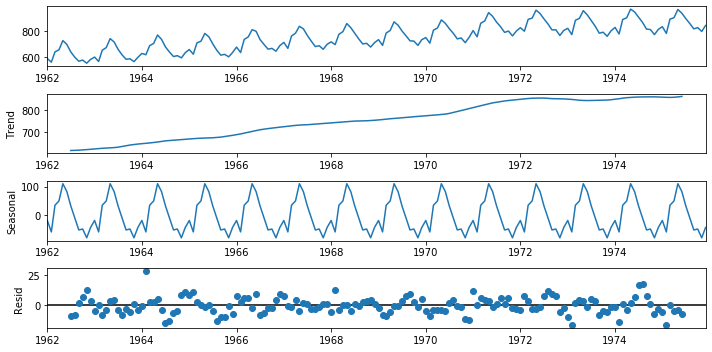

In [38]:
# Plot decomposition
decomp.plot();

### Seasonal ACF and PACF
Below is a time series showing the estimated number of water consumers in London. By eye you can't see any obvious seasonal pattern, however your eyes aren't the best tools you have.

In this exercise you will use the ACF and PACF to test this data for seasonality. You can see from the plot above that the time series isn't stationary, so you should probably detrend it. You will detrend it by subtracting the moving average. Remember that you could use a window size of any value bigger than the likely period.

The `plot_acf()` function has been imported and the time series has been loaded in as `water`.

In [52]:
water = water_dataset.copy()

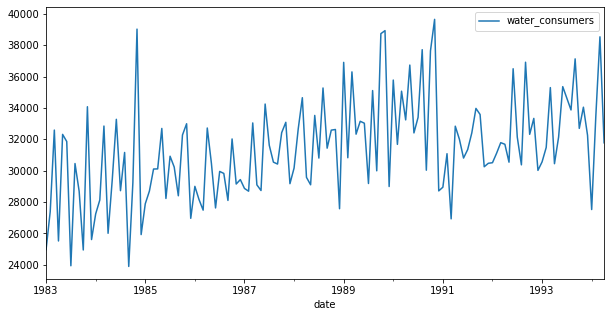

In [53]:
water.plot();

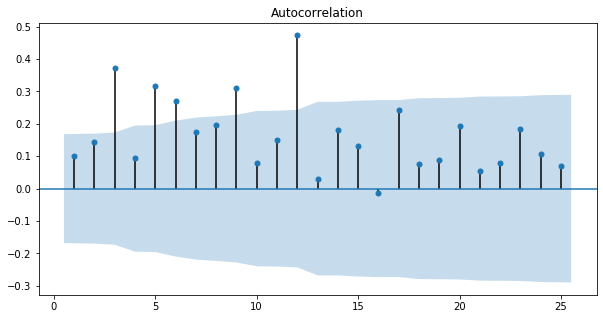

In [40]:
# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water, lags=25, zero=False,  ax=ax1);

In [42]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

In [43]:
# Drop the NaN values
water_2 = water_2.dropna()

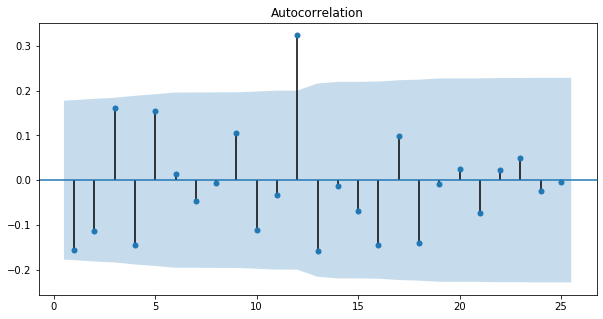

In [44]:
# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1);

What is the time period of the seasonal component of this data?
- 12 time steps.

### Fitting SARIMA models
Fitting SARIMA models is the beginning of the end of this journey into time series modeling.

It is important that you get to know your way around the SARIMA model orders and so that's what you will focus on here.

In this exercise, you will practice fitting different SARIMA models to a set of time series.

The time series DataFrames `df1`, `df2` and `df3` and the `SARIMAX` model class are available in your environment.

In [54]:
water = water_dataset.copy()

In [55]:
# Create a SARIMAX model
model = SARIMAX(water, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                   water_consumers   No. Observations:                  136
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood               -1248.851
Date:                           Sat, 01 Jan 2022   AIC                           2503.702
Time:                                   23:27:42   BIC                           2512.281
Sample:                               01-01-1983   HQIC                          2507.188
                                    - 04-01-1994                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0062      0.067      0.093      0.926      -0.124       0.137
ar.S.L7       -0.1563      0.036     -4.394

In [56]:
# Create a SARIMAX model
model = SARIMAX(water, order=(2,1,1), seasonal_order=(1,0,0,4))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                    water_consumers   No. Observations:                  136
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood               -1290.868
Date:                            Sat, 01 Jan 2022   AIC                           2591.736
Time:                                    23:27:46   BIC                           2606.262
Sample:                                01-01-1983   HQIC                          2597.639
                                     - 04-01-1994                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0639      0.063     -1.012      0.312      -0.188       0.060
ar.L2         -0.1382      0.047   

In [57]:
# Create a SARIMAX model
model = SARIMAX(water, order=(1,1,0), seasonal_order=(0,1,1,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                      water_consumers   No. Observations:                  136
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -1182.495
Date:                              Sat, 01 Jan 2022   AIC                           2370.990
Time:                                      23:27:50   BIC                           2379.427
Sample:                                  01-01-1983   HQIC                          2374.417
                                       - 04-01-1994                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4525      0.073     -6.230      0.000      -0.595      -0.310
ma.S.L12      -0.74

### Choosing SARIMA order
In this exercise you will find the appropriate model order for a new set of time series. This is monthly series of the number of employed persons in Australia (in thousands). The seasonal period of this time series is 12 months.

You will create non-seasonal and seasonal ACF and PACF plots and use the table below to choose the appropriate model orders.

|      | AR(p) | MA(q) | ARMA(p,q) |
| :-- | :-- | :-- | :-- |
| ACF  | Tails off | Cuts off after lag q | Tails off |
| PACF | Cuts off after lag p | Tails off | Tails off |

The DataFrame `aus_employment` and the functions `plot_acf()` and `plot_pacf()` are available in your environment.

Note that you can take multiple differences of a DataFrame using `df.diff(n1).diff(n2)`.

In [65]:
aus_employment = aus_employment_dataset.copy()

In [66]:
# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

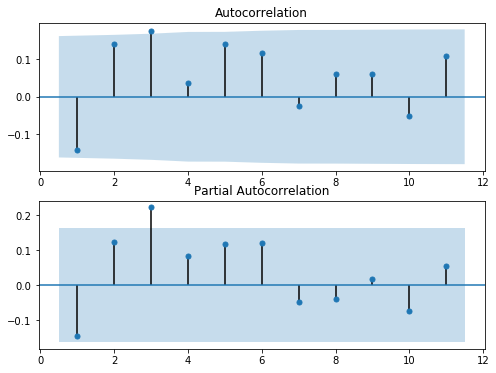

In [68]:
# Create the figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, zero=False, lags=11, ax=ax1);

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, zero=False, lags=11, ax=ax2);

In [ ]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

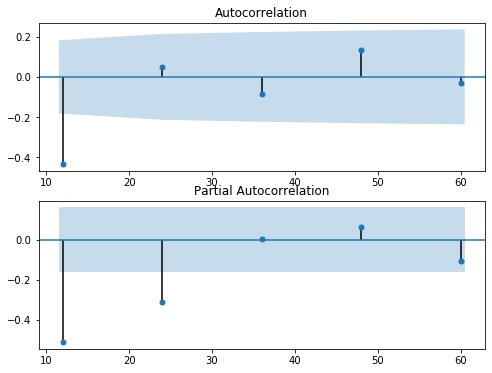

In [69]:
# Create the figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags, ax=ax1);

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags, ax=ax2);

Based on the ACF and PACF plots, which of these models is most likely for the data?
- SARIMAX(0,1,0)(0,1,1,12)

### SARIMA vs ARIMA forecasts
In this exercise, you will see the effect of using a SARIMA model instead of an ARIMA model on your forecasts of seasonal time series.

Two models, an ARIMA(3,1,2) and a SARIMA(0,1,1)(1,1,1,12), have been fit to the Wisconsin employment time series. These were the best ARIMA model and the best SARIMA model available according to the AIC.

In the exercise you will use these two models to make dynamic future forecast for 25 months and plot these predictions alongside held out data for this period, `wisconsin_test`.

The fitted ARIMA results object and the fitted SARIMA results object are available in your environment as `arima_results` and `sarima_results`.

In [92]:
wisconsin_train = wisconsin_train_dataset.copy()
wisconsin_test = wisconsin_test_dataset.copy()
dates = wisconsin_test.index.to_list()

arima_model = SARIMAX(wisconsin_train, order=(3, 1, 2))
arima_results = arima_model.fit()

sarima_model = SARIMAX(wisconsin_train, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [96]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(25)
arima_mean = arima_pred.predicted_mean

In [97]:
# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(25)
sarima_mean = sarima_pred.predicted_mean

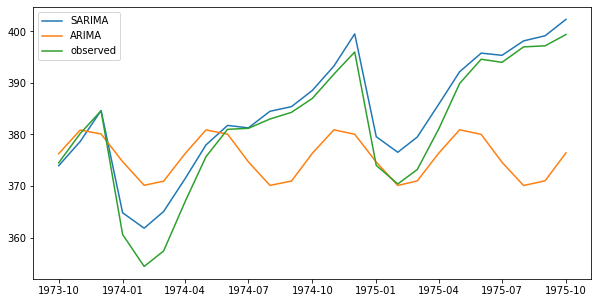

In [100]:
# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()

### Automated model selection
The `pmdarima` package is a powerful tool to help you choose the model orders. You can use the information you already have from the identification step to narrow down the model orders which you choose by automation.

Remember, although automation is powerful, it can sometimes make mistakes that you wouldn't. It is hard to guess how the input data could be imperfect and affect the test scores.

In this exercise you will use the `pmdarima` package to automatically choose model orders for some time series datasets.

**Be careful when setting the model parameters, if you set them incorrectly your session may time out.**

Three datasets are available in your environment as `df1`, `df2` and `df3`.

In [112]:
df1 = sample_dataset.copy().loc[:'2013-02-04']
df2 = sample_dataset.copy().loc[:'2013-04-10']
df3 = sample_dataset.copy().loc[:'2013-03-01']

Model the time series df1 with period 7 days and set first order seasonal differencing and no non-seasonal differencing.

In [106]:
# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1,
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=113.838, Time=0.00 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=97.077, Time=0.03 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=112.025, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=106.660, Time=0.01 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=96.770, Time=0.06 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=107.396, Time=0.04 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=98.663, Time=0.10 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=98.729, Time=0.10 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=100.408, Time=0.07 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=100.329, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[7]             : AIC=94.925, Time=0.05 sec
 AR

In [107]:
# Print model summary
print(model1.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   35
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 7)   Log Likelihood                 -43.462
Date:                           Sun, 02 Jan 2022   AIC                             94.925
Time:                                   00:51:56   BIC                            100.254
Sample:                                        0   HQIC                            96.554
                                            - 35                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5900      0.160     -3.690      0.000      -0.903      -0.277
ar.S.L7       -0.8922      0.211     -4.236

Create a model to fit df2. Set the non-seasonal differencing to 1, the trend to a constant and set no seasonality.

In [109]:
# Create model
model2 = pm.auto_arima(df2,
                      seasonal=False,
                      d=1,
                      trend='c',
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=358.714, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=294.532, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=358.714, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=281.511, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=281.511, Time=0.02 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 0.425 seconds


In [110]:
# Print model summary
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -136.756
Date:                Sun, 02 Jan 2022   AIC                            281.511
Time:                        00:56:06   BIC                            291.892
Sample:                             0   HQIC                           285.711
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0062      0.100     -0.062      0.951      -0.203       0.190
ar.L1         -0.9755      0.081    -12.099      0.000      -1.133      -0.817
ar.L2         -0.3800      0.117     -3.261      0.0

Fit a SARIMAX(p,1,q)(P,1,Q) model to the data setting start_p, start_q, max_p, max_q, max_P and max_Q to 1.

In [113]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1,
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=244.454, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=192.200, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=203.919, Time=0.01 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=185.542, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=183.888, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[7] intercept   : AIC=185.677, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,1,1)[7]          
Total fit time: 0.797 seconds


In [114]:
# Print model summary
print(model3.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 7)   Log Likelihood                 -88.944
Date:                             Sun, 02 Jan 2022   AIC                            183.888
Time:                                     01:00:28   BIC                            189.742
Sample:                                          0   HQIC                           186.133
                                              - 60                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7374      0.084     -8.784      0.000      -0.902      -0.573
ma.S.L7       -0.8470      

### aving and updating models
Once you have gone through the steps of the Box-Jenkins method and arrived at a model you are happy with, you will want to be able to save that model and also to incorporate new measurements when they are available. This is key part of putting the model into production.

In this exercise you will save a freshly trained model to disk, then reload it to update it with new data.

The model is available in your environment as model.

In [116]:
# Set model name
filename = 'sample_model.pkl'

In [117]:
# Pickle it
joblib.dump(model1,filename)

['sample_model.pkl']

In [118]:
# Load the model back in
loaded_model = joblib.load(filename)

In [119]:
# Update the model
loaded_model.update(df2)

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(2, 1, 0, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

### SARIMA model diagnostics
Usually the next step would be to find the order of differencing and other model orders. However, this time it's already been done for you. The time series is best fit by a SARIMA(1, 1, 1)(0, 1, 1, 12) model with an added constant.

In this exercise you will make sure that this is a good model by first fitting it using the SARIMAX class and going through the normal model diagnostics procedure.

The DataFrame, co2, and the SARIMAX model class are available in your environment.

In [151]:
co2 = co2_dataset.copy().loc['1990-01-01':]

In [152]:
# Create model object
model = SARIMAX(co2,
                order=(1,1,1),
                seasonal_order=(0,1,1,12),
                trend='c')

In [153]:
# Fit model
results = model.fit()

In [154]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            CO2_ppm   No. Observations:                  345
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -100.994
Date:                            Sun, 02 Jan 2022   AIC                            211.988
Time:                                    01:30:46   BIC                            231.013
Sample:                                01-01-1990   HQIC                           219.575
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0027      0.001      3.056      0.002       0.001       0.005
ar.L1          0.2350      0.110   

In the console, print the summary of the results object you just created. Is there anything wrong with this model?
- The residuals are not correlated and The residuals are normally distributed.

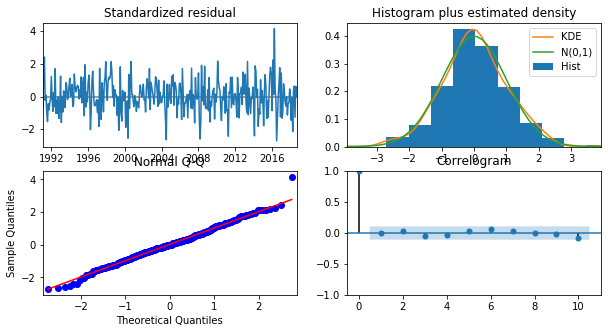

In [155]:
# Plot common diagnostics
results.plot_diagnostics()
plt.show()

Examine the plot you just created. Is there anything wrong with this model?
- The residuals are not correlated and The residuals are normally distributed.

### SARIMA forecast
In the previous exercise you confirmed that a SARIMA(1,1,1)x(0,1,1,12) model was a good fit to the CO2 time series by using diagnostic checking.

Now its time to put this model into practice to make future forecasts. Climate scientists tell us that we have until 2030 to drastically reduce our CO2 emissions or we will face major societal challenges.

In this exercise, you will forecast the CO2 time series up to the year 2030 to find the CO2 levels if we continue emitting as usual.

The trained model results object is available in your environment as results.

In [144]:
co2 = co2_dataset.copy().loc['1990-01-01':]
model = SARIMAX(co2, order=(1,1,1), seasonal_order=(0,1,1,12), trend='c')
results = model.fit()

In [145]:
# Create forecast object
forecast_object = results.get_forecast(136)

In [146]:
# Extract predicted mean attribute
mean = forecast_object.predicted_mean

In [147]:
# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

In [148]:
# Extract the forecast dates
dates = mean.index

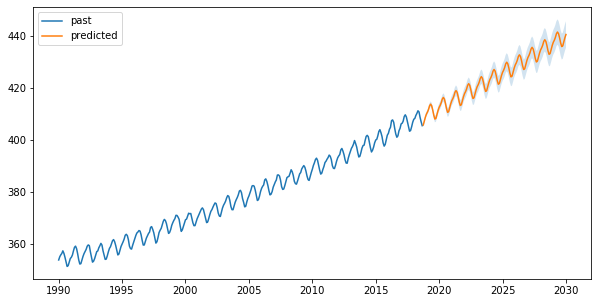

In [150]:
plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(mean.index, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(conf_int.index, conf_int.loc[:,'lower CO2_ppm'], conf_int.loc[:,'upper CO2_ppm'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [156]:
# Print last predicted mean
print(mean.iloc[-1])

440.6050967232407


In [157]:
# Print last confidence interval
print(conf_int.iloc[-1])

lower CO2_ppm    435.495702
upper CO2_ppm    445.714492
Name: 2030-01-01 00:00:00, dtype: float64
